In [1]:
%plot -b inline -h 1000 -w 1500


selected_case =

  1x6 cell array

  Columns 1 through 4

    {'5micron'}    {'gravity'}    {'no_solute'}    {'5micron_seed'}

  Columns 5 through 6

    {'double_seeding'}    {'GCCN'}



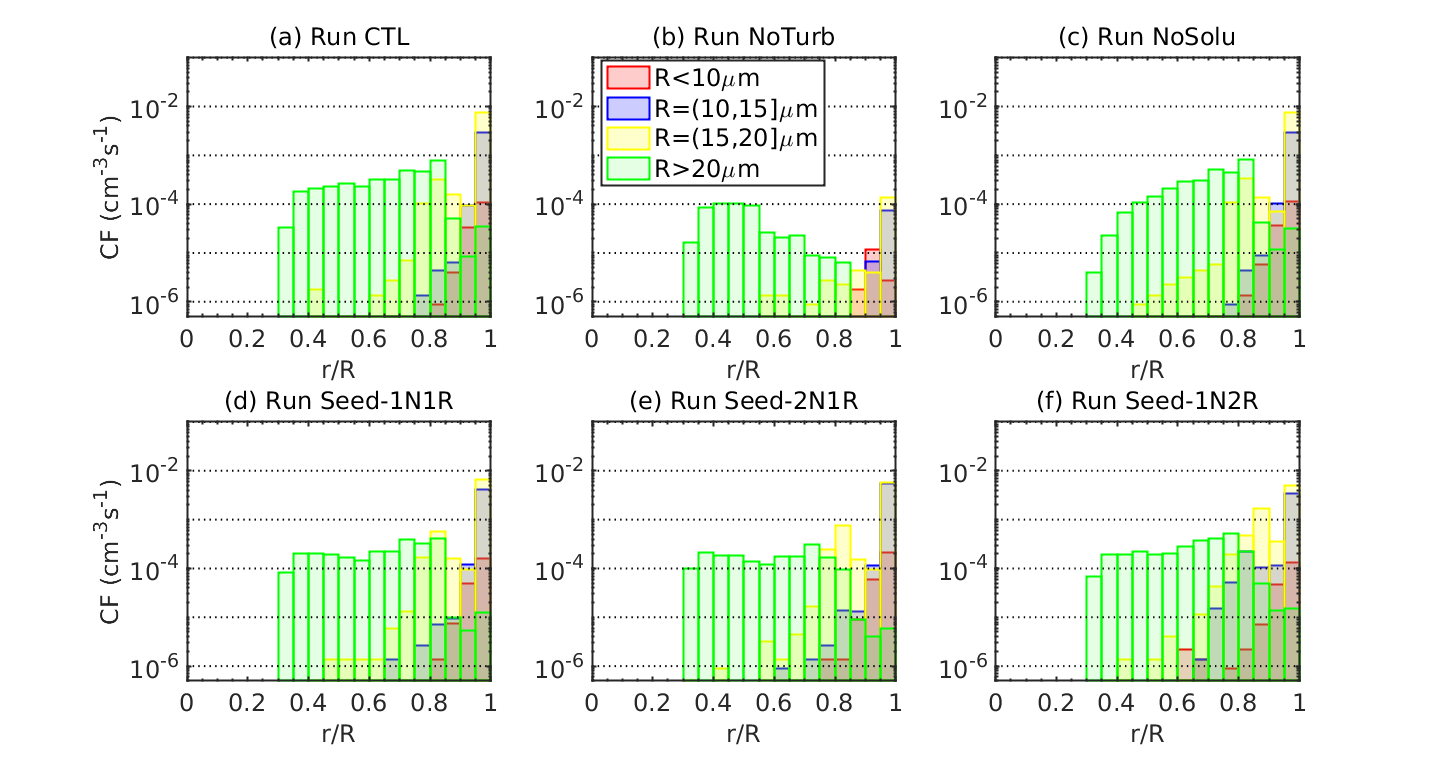

In [11]:
clear all
fontsize_set=18;
filedir = '/glade/u/home/sisichen/seeding_cases_link/cc_largedt';
%filedir = '/glade/u/home/sisichen/seeding_cases_link/condensation_only';
iplot=1;%plot out 
iplot_freq_time=0; %compute collision frequency vs time
iplot_freq_ratio=1; %compute collision frequency vs ratio
iplot_grps=1; %=1 categorize into different R groups, =0 only one group
ntdim=50; %sampling freq for time
if iplot_freq_time==1 && iplot_grps==0
    ndim=50; %sampling volume for each r_ratio
else
    ndim=20;
end
scenario={'5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN'};
total_case=[1:6];
tag={'(a) Run CTL','(b) Run NoTurb','(c) Run NoSolu','(d) Run Seed-1N1R','(e) Run Seed-2N1R','(f) Run Seed-1N2R'};
tag_oneplot={'Run CTL','Run NoTurb','Run NoSolu','Run Seed-1N1R','Run Seed-2N1R','Run Seed-1N2R'};
selected_case=scenario(total_case)
nsubplot=length(total_case);
l=16.5;%domain size
TIME=500;
Prob=NaN;
%TIME=6.*60; %Time duration (min)
prop1=NaN;
prop2=NaN;
prop3=NaN;
prop4=NaN;
%% colormap
imap = 1;
if imap==1 %gist_ncar colormap
    map=[0.        , 0.        , 0.502;
       0.        , 0.77522593, 1.;
       0.14987018, 0.94079948, 0.;
       0.85737517, 1.        , 0.12482388;
       1.        , 0.44038591, 0.02197245;
       0.70312941, 0.14841648, 1.;
       0.9961    , 0.9725    , 0.9961];
elseif imap==2
    map=colormap(hsv(nsubplot));
elseif imap==3 %gist_rainbow
    map=[1., 0., 0.16; 1., 0.91891892, 0; 0., 1., 0; 0., 0.92391304, 1.; 0.16304348, 0., 1.; 1., 0., 0.75];
end
figure1=figure ;
set(0,'DefaultAxesTitleFontWeight','normal');%change title from bold to normal
%%
for simu=1:nsubplot
    COLL=NaN;
    NCOLL=0;
    r_ratio=0;
    r1=NaN;
    r2=NaN;
    COLL_TIME=NaN;
    CASE=scenario{total_case(simu)};
    filename=[filedir '/', CASE, '/RUN06262018.coldat' ];
    COLL=load(filename);
	[m,n]=size(COLL);
	COLL_TIME=COLL(:,1);
    time_series=find(COLL_TIME<=TIME);
    %n_time=length(time_series);
    
	r1=COLL(time_series,17);
	r2=COLL(time_series,18);
    %find the pairs with R<=10microns
	R1_rng1=find(r1>r2&r1<=1e-5);
	R2_rng1=find(r1<=r2&r2<=1e-5);
    %find the pairs with R=(10,15]microns
	R1_rng2=find(r1>r2&r1<=15e-6&r1>1e-5);
	R2_rng2=find(r1<=r2&r2<=15e-6&r2>1e-5);
    %find the pairs with R=(15,20]microns
	R1_rng3=find(r1>r2&r1<=20e-6&r1>15e-6);
	R2_rng3=find(r1<=r2&r2<=20e-6&r2>15e-6);
    %find the pairs with R>20microns
	R1_rng4=find(r1>r2&r1>20e-6);
	R2_rng4=find(r1<=r2&r2>20e-6);
    
    %only one R group
	R1=find(r1>r2);
	R2=find(r1<=r2);
    
	r_ratio_a=r2(R1)./r1(R1);
	r_ratio_b=r1(R2)./r2(R2);
    r_ratio_0=[r_ratio_a;r_ratio_b];
    
    %subdivided into different R groups
	r_ratio_a=r2(R1_rng1)./r1(R1_rng1);
	r_ratio_b=r1(R2_rng1)./r2(R2_rng1);
    r_ratio_1=[r_ratio_a;r_ratio_b];
    
    time_r_ratio_1=[COLL_TIME(R1_rng1);COLL_TIME(R2_rng1)];
    
	r_ratio_a=r2(R1_rng2)./r1(R1_rng2);
	r_ratio_b=r1(R2_rng2)./r2(R2_rng2);
    r_ratio_2=[r_ratio_a;r_ratio_b];
    
    time_r_ratio_2=[COLL_TIME(R1_rng2);COLL_TIME(R2_rng2)];
    
	r_ratio_a=r2(R1_rng3)./r1(R1_rng3);
	r_ratio_b=r1(R2_rng3)./r2(R2_rng3);
    r_ratio_3=[r_ratio_a;r_ratio_b];
    
    time_r_ratio_3=[COLL_TIME(R1_rng3);COLL_TIME(R2_rng3)];
    
	r_ratio_a=r2(R1_rng4)./r1(R1_rng4);
	r_ratio_b=r1(R2_rng4)./r2(R2_rng4);
    r_ratio_4=[r_ratio_a;r_ratio_b];
    
    time_r_ratio_4=[COLL_TIME(R1_rng4);COLL_TIME(R2_rng4)];


    %Nindex=find(COLL_TIME>=TIME);
    %END=Nindex(1);
    if iplot_freq_ratio==1
        NCOLL=zeros(4,ndim);
        for iratio=1:ndim
            Nindex=find(r_ratio_1>=(iratio-1)/ndim & r_ratio_1<iratio/ndim);
            if ~isempty(Nindex)
            NCOLL(1,iratio)=length(r_ratio_1(Nindex));
            end
            Nindex=find(r_ratio_2>=(iratio-1)/ndim & r_ratio_2<iratio/ndim);
            if ~isempty(Nindex)
            NCOLL(2,iratio)=length(r_ratio_2(Nindex));
            end
            Nindex=find(r_ratio_3>=(iratio-1)/ndim & r_ratio_3<iratio/ndim);
            if ~isempty(Nindex)
            NCOLL(3,iratio)=length(r_ratio_3(Nindex));
            end
            Nindex=find(r_ratio_4>=(iratio-1)/ndim & r_ratio_4<iratio/ndim);
            if ~isempty(Nindex)
            NCOLL(4,iratio)=length(r_ratio_4(Nindex));
            end
        end
    end
    if iplot_freq_time == 1
        if iplot_grps==0
            NCOLL=0;
            for itime=1:ntdim
                Nindex=find(COLL_TIME>=(itime-1)*TIME/ntdim &...
                    COLL_TIME<itime*TIME/ntdim);
                NCOLL(itime)=length(COLL_TIME(Nindex));
            end
            NFREQ(:,simu)=NCOLL/(TIME/ntdim)/l^3; %collision frequency unit time unit volume
        elseif iplot_grps==1
        	NCOLL=zeros(5,ntdim);
            for itime=1:ntdim
                Nindex=find(time_r_ratio_1>=(itime-1)*TIME/ntdim &...
                    time_r_ratio_1<itime*TIME/ntdim);
                if ~isempty(Nindex)
                    NCOLL(1,itime)=length(time_r_ratio_1(Nindex));
                end
                Nindex=find(time_r_ratio_2>=(itime-1)*TIME/ntdim &...
                    time_r_ratio_2<itime*TIME/ntdim);
                if ~isempty(Nindex)
                    NCOLL(2,itime)=length(time_r_ratio_2(Nindex));
                end
                Nindex=find(time_r_ratio_3>=(itime-1)*TIME/ntdim &...
                    time_r_ratio_3<itime*TIME/ntdim);
                if ~isempty(Nindex)
                    NCOLL(3,itime)=length(time_r_ratio_3(Nindex));
                end
                Nindex=find(time_r_ratio_4>=(itime-1)*TIME/ntdim &...
                    time_r_ratio_4<itime*TIME/ntdim);
                if ~isempty(Nindex)
                    NCOLL(4,itime)=length(time_r_ratio_4(Nindex));
                end
            end  
            NCOLL(5,:)=NCOLL(1,:)+NCOLL(2,:)+NCOLL(3,:)+NCOLL(4,:);
            NFREQ_1(:,simu)=NCOLL(1,:)/(TIME/ntdim)/l^3;
            NFREQ_2(:,simu)=NCOLL(2,:)/(TIME/ntdim)/l^3;
            NFREQ_3(:,simu)=NCOLL(3,:)/(TIME/ntdim)/l^3;
            NFREQ_4(:,simu)=NCOLL(4,:)/(TIME/ntdim)/l^3;
            NFREQ(:,simu)=NCOLL(5,:)/(TIME/ntdim)/l^3;
        end
    end
    if iplot_freq_ratio == 1
        NFREQ_1(:,simu)=NCOLL(1,:)/TIME/l^3;
        NFREQ_2(:,simu)=NCOLL(2,:)/TIME/l^3;
        NFREQ_3(:,simu)=NCOLL(3,:)/TIME/l^3;
        NFREQ_4(:,simu)=NCOLL(4,:)/TIME/l^3;
        NFREQ_T(:,simu)=(NCOLL(4,:)+NCOLL(3,:)+NCOLL(2,:)+NCOLL(1,:))/TIME/l^3;
    end
    
    if(iplot==1)
        if iplot_freq_ratio==1
             switch true
                 case nsubplot==6
                    subplot(2,3,simu);
                 case nsubplot==4
                     subplot(2,2,simu);
                 case nsubplot<4 || nsubplot==5 || nsubplot>6
                     subplot(nsubplot,1,simu);
             end
             
        end

        if iplot_freq_time==1
            if(iplot_grps==1)
              subplot(2,3,1);
              hold on
              plot([1:ntdim]*TIME/ntdim/60,NFREQ_1(:,simu),'LineWidth',2,'Color',map(simu,:),'LineStyle','-');
              subplot(2,3,2);
              hold on
              plot([1:ntdim]*TIME/ntdim/60,NFREQ_2(:,simu),'LineWidth',2,'Color',map(simu,:),'LineStyle','-');
              subplot(2,3,3);
              hold on
              plot([1:ntdim]*TIME/ntdim/60,NFREQ_3(:,simu),'LineWidth',2,'Color',map(simu,:),'LineStyle','-');
              subplot(2,3,4);
              hold on
              plot([1:ntdim]*TIME/ntdim/60,NFREQ_4(:,simu),'LineWidth',2,'Color',map(simu,:),'LineStyle','-');
              subplot(2,3,5);
              hold on
              plot([1:ntdim]*TIME/ntdim/60,NFREQ(:,simu),'LineWidth',2,'Color',map(simu,:),'LineStyle','-');
            else
                hold on
                plot([1:ndim]*TIME/ntdim/60,NFREQ(:,simu),'LineWidth',2,'Color',map(simu,:),'LineStyle','-');
            end
        elseif iplot_freq_ratio==1
            for i=1:ndim
                PDF_1(i,simu)=NFREQ_1(i,simu)/nansum(NFREQ_1(:,simu));
                PDF_2(i,simu)=NFREQ_2(i,simu)/nansum(NFREQ_2(:,simu));
                PDF_3(i,simu)=NFREQ_3(i,simu)/nansum(NFREQ_3(:,simu));
                PDF_4(i,simu)=NFREQ_4(i,simu)/nansum(NFREQ_4(:,simu));
                PDF_T(i,simu)=NFREQ_T(i,simu)/nansum(NFREQ_T(:,simu));
            end
            if iplot_grps==0
                A=histogram(r_ratio_0(1:end),ndim,'BinLimits',[0,1],'Normalization','count');
                X=A.BinEdges(2:end)-A.BinWidth/2;
                %bar(X,[NFREQ_1(:,simu) NFREQ_2(:,simu) NFREQ_3(:,simu) NFREQ_4(:,simu)],1,'stack');
                bar(X,NFREQ_T(:,simu),1,'FaceColor','k','FaceAlpha',0.1,'EdgeColor','k');
                hold on
                xlabel('r/R');
                ylabel('CF (cm^{-3}s^{-1})')%collision frequency=CF
                
            elseif iplot_grps==1
                A=histogram(r_ratio_1(1:end),ndim,'BinLimits',[0,1],'Normalization','count');
                X=A.BinEdges(2:end)-A.BinWidth/2;
                %bar(X,PDF(:,simu),1);
                bar(X,NFREQ_1(:,simu),1,'FaceColor','r','FaceAlpha',0.2,'EdgeColor','r');
                hold on
                bar(X,NFREQ_2(:,simu),1,'FaceColor','b','FaceAlpha',0.2,'EdgeColor','b');
                bar(X,NFREQ_3(:,simu),1,'FaceColor','y','FaceAlpha',0.2,'EdgeColor','y');
                bar(X,NFREQ_4(:,simu),1,'FaceColor','g','FaceAlpha',0.1,'EdgeColor','g');
                
            end
            switch simu
                case 1
                    ylabel('CF (cm^{-3}s^{-1})','FontSize',fontsize_set);
                case 2
                    if (iplot_grps==1)
                        hlegend=legend('R<10\mum','R=(10,15]\mum','R=(15,20]\mum','R>20\mum');
                    end
                case 4
                    ylabel('CF (cm^{-3}s^{-1})','FontSize',fontsize_set);
            end
            xlabel('r/R');
        end
    end
     if (iplot_freq_ratio == 1)
        title(tag(total_case(simu)));
     end
end
if (iplot_freq_time == 1)
    if (iplot_grps==1)
        ax = findobj(figure1,'Type','Axes');
        title(ax(1),'(e) All droplets')
        title(ax(2),'(d) R>20\mum')
        title(ax(3),'(c) R=(15,20]\mum')
        title(ax(4),'(b) R=(10,15]\mum')
        title(ax(5),'(a) R<10\mum')
        xlabel(ax(1),'Time (min)')
        xlabel(ax(2),'Time (min)')
        xlabel(ax(3),'Time (min)')
        xlabel(ax(4),'Time (min)')
        xlabel(ax(5),'Time (min)')
        
        ylabel(ax(2),'CF (cm^{-3}s^{-1})')
        ylabel(ax(5),'CF (cm^{-3}s^{-1})')
        for i=1:5
            ylim(ax(i),[0 0.05])
            xlim(ax(i),[0 TIME/60])
            box(ax(i),'on')
            grid(ax(i),'on')
        end
    else
            xlabel('Time (min)')
            ylabel('Collision frequency (cm^{-3}s^{-1})')
            xlim([0 TIME/60])
            box on
            grid on
    end
    hlegend=legend(tag_oneplot);
elseif (iplot_freq_ratio == 1)
    ax = findobj(figure1,'Type','Axes');
    for i = 1:6
        ylim(ax(i),[5e-7,1e-1]);
        xlim(ax(i),[0 1]);
        set(ax(i),'XMinorTick','on','XTick',[0 0.2 0.4 0.6 0.8 1],'YScale','log','YTick',[1e-6 1e-4 1e-2 ]);
        g_y=[1e-6 1e-5 1e-4 1e-3 1e-2 1e-1]; % user defined grid Y [start:spaces:end]
        g_x=[0 1];
        for ii=1:length(g_y)
           subplot(2,3,i);
           plot([g_x(1) g_x(end)],[g_y(ii) g_y(ii)],'k:'); %y grid lines
           hold on    
        end
    end
    hlegend=legend(ax(5),'R<10\mum','R=(10,15]\mum','R=(15,20]\mum','R>20\mum');
end
%enhancement due to condensational-enhanced collisions
if iplot_grps==1 && nsubplot==2
    NFREQ_Ratio_1=NFREQ_1(:,1)./NFREQ_1(:,2);
    NFREQ_Ratio_2=NFREQ_2(:,1)./NFREQ_2(:,2);
    NFREQ_Ratio_3=NFREQ_3(:,1)./NFREQ_3(:,2);
    NFREQ_Ratio_4=NFREQ_4(:,1)./NFREQ_4(:,2);
    figure2=figure;
    QF_Enhance=bar(X,NFREQ_Ratio_1,1,'FaceColor','r','FaceAlpha',0.1,'EdgeColor','r');
    hold on
    QF_Enhance=bar(X,NFREQ_Ratio_2,1,'FaceColor','b','FaceAlpha',0.1,'EdgeColor','b');
    QF_Enhance=bar(X,NFREQ_Ratio_3,1,'FaceColor','y','FaceAlpha',0.1,'EdgeColor','y');
    QF_Enhance=bar(X,NFREQ_Ratio_4,1,'FaceColor','g','FaceAlpha',0.1,'EdgeColor','g');
    xlabel('r/R')
    ylabel('enhancement of collision frequency')
    legend('R<10\mum','R=(10,15]\mum','R=(15,20]\mum','R>20\mum');
    set(gca,'XTick',[0 0.2 0.4 0.6 0.8 1]);
end
set(findall(gcf,'-property','FontSize'),'FontSize',fontsize_set)
set(findall(gcf,'-property','LineWidth'),'LineWidth',1.5)
set(gcf, 'PaperPosition', [0 0 15 8]);
set(gcf, 'PaperSize', [15 8]);
if iplot_freq_ratio == 1
    set(hlegend,'Position',[0.42 0.73 0.15 0.22]) %for colfreq with r/R
    savefig(figure1,'Fig_colfreq.fig')
    saveas(figure1,'Fig_colfreq','pdf')
    print(figure1, '-depsc', 'Fig_colfreq.eps');
end
if  iplot_freq_time == 1
    set(hlegend,'Position',[0.7 0.2 0.15 0.22]) %for colfreq time
    %savefig(figure1,'Fig_colfreq_time.fig')
    saveas(figure1,'Fig_colfreq_time','pdf')
    print(figure1, '-depsc', 'Fig_colfreq_time.eps');
end
%'Position',[0.15 0.7 0.08 0.15];[0.3 0.64 0.16 0.26];[0.43 0.74 0.15 0.22];[0.7 0.15 0.15 0.22]

%print(figure1, '-depsc', 'colfreq_time.eps');
%saveas(figure1,'Fig_colfreq_time','pdf')